In [4]:
import pandas as pd
from datetime import timedelta
import utils, os

%config InlineBackend.figure_format = 'svg'

In [2]:
settings = utils.load_settings()
cleaned_data_dir = settings["cleaned_data_dir"]
plots_dir = settings["plots_dir"]

In [3]:
df = pd.read_parquet(os.path.join(cleaned_data_dir, "cleaned_dataset.parquet"))
df.drop(columns=["Accession ID", "col_date", "sub_date", 'country'], inplace=True)

In [8]:
start_date = pd.to_datetime('2020-03-29')  
n_days_delta = timedelta(days=7)

In [9]:
df_before = df[df['date'] <= start_date]
df_before

,lineage,country,date,sequence
0,B.1,Niger,2020-01-01,AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCT...
1,B.1.221,Morocco,2020-02-02,AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...
2,B.1,Morocco,2020-02-02,AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...
3,B.1,Morocco,2020-02-02,AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...
4,B.1.221,Morocco,2020-02-02,AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...
...,...,...,...,...
264,B.1,Algeria,2020-03-29,TTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGT...
265,A,Nigeria,2020-03-29,GGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTT...
266,B.1.476,Nigeria,2020-03-29,CTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGT...
267,A,Togo,2020-03-29,TATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAG...


In [10]:
mask = (df['date'] > start_date) & (df['date'] <= start_date + n_days_delta)
selected_observations = df.loc[mask]

In [11]:
selected_observations

,lineage,country,date,sequence
269,B.1.9,Tunisia,2020-03-30,ACTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCT...
270,B.1,Senegal,2020-03-30,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...
271,B.1,South Africa,2020-03-30,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...
272,B.1,Morocco,2020-03-30,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
273,B,Uganda,2020-03-30,AACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC...
...,...,...,...,...
367,B.1,South Africa,2020-04-05,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
368,B.1,South Africa,2020-04-05,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
369,B.40,Nigeria,2020-04-05,GGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTT...
370,B.1,South Africa,2020-04-05,ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATC...


In [13]:
start_date + n_days_delta

Timestamp('2020-04-05 00:00:00')

In [14]:
2 * n_days_delta

datetime.timedelta(days=14)

Mean Time Lag: 0.6666666666666666 days
Median Time Lag: 2.0 days
Standard Deviation: 5.131601439446884 days


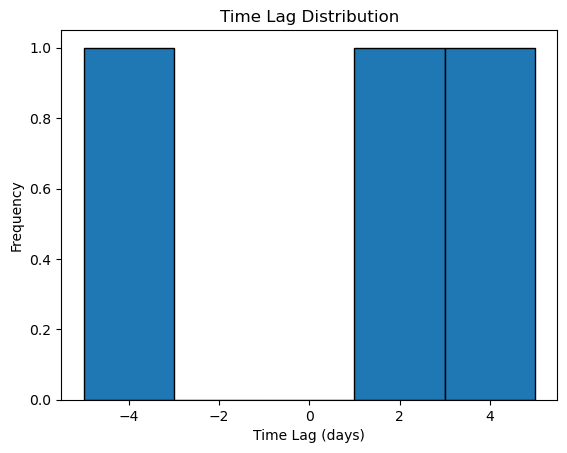

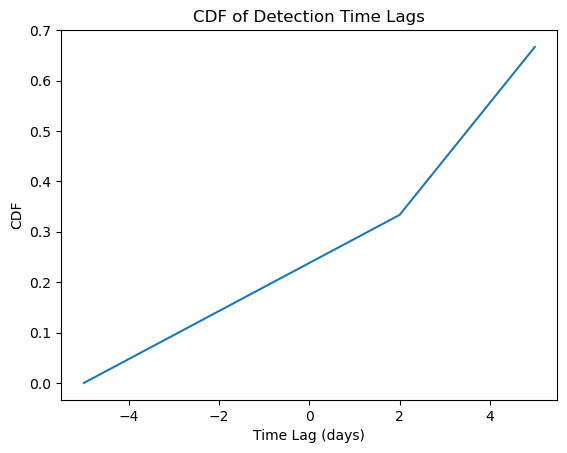

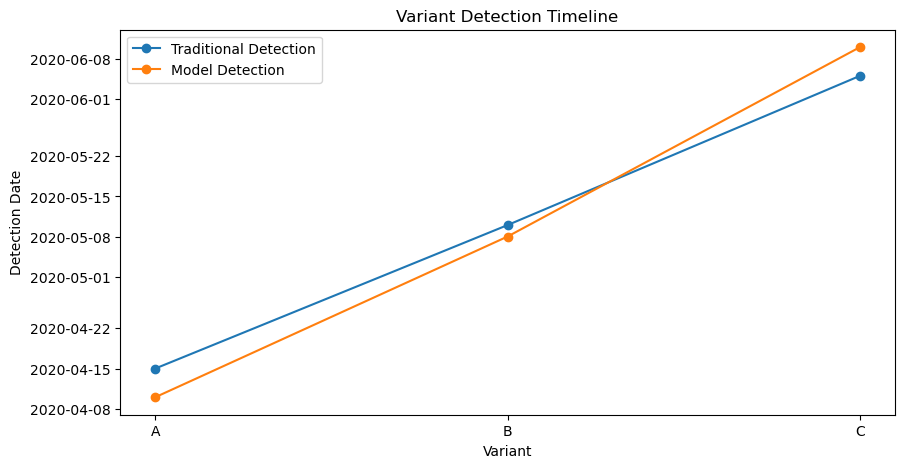

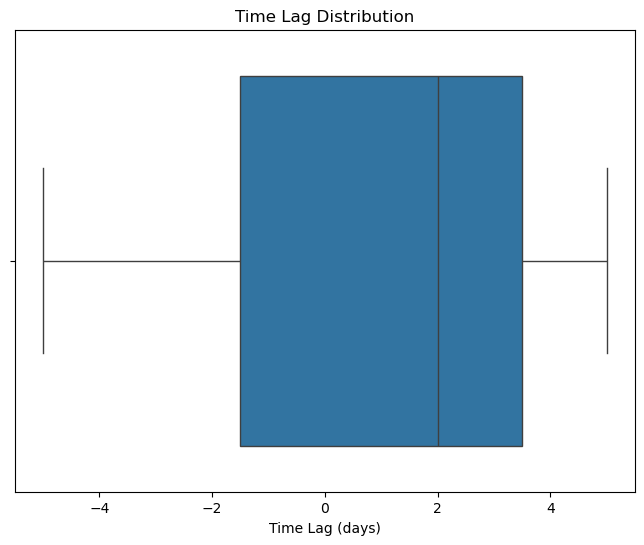

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
data = {'Variant': ['A', 'B', 'C'],
        'Traditional': ['2020-04-15', '2020-05-10', '2020-06-05'],
        'Model': ['2020-04-10', '2020-05-08', '2020-06-10']}

df = pd.DataFrame(data)
df['Traditional'] = pd.to_datetime(df['Traditional'])
df['Model'] = pd.to_datetime(df['Model'])
df['Time Lag'] = (df['Traditional'] - df['Model']).dt.days

# Summary statistics
mean_lag = df['Time Lag'].mean()
median_lag = df['Time Lag'].median()
std_lag = df['Time Lag'].std()

print(f"Mean Time Lag: {mean_lag} days")
print(f"Median Time Lag: {median_lag} days")
print(f"Standard Deviation: {std_lag} days")

# Histogram
plt.hist(df['Time Lag'], bins=5, edgecolor='black')
plt.title('Time Lag Distribution')
plt.xlabel('Time Lag (days)')
plt.ylabel('Frequency')
plt.show()

# CDF
time_lags_sorted = np.sort(df['Time Lag'])
cdf = np.arange(len(time_lags_sorted)) / float(len(time_lags_sorted))
plt.plot(time_lags_sorted, cdf)
plt.title('CDF of Detection Time Lags')
plt.xlabel('Time Lag (days)')
plt.ylabel('CDF')
plt.show()

# Time Series Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Variant'], df['Traditional'], label='Traditional Detection', marker='o')
plt.plot(df['Variant'], df['Model'], label='Model Detection', marker='o')
plt.title('Variant Detection Timeline')
plt.xlabel('Variant')
plt.ylabel('Detection Date')
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Time Lag'])
plt.title('Time Lag Distribution')
plt.xlabel('Time Lag (days)')
plt.show()
